In [164]:
import sidrapy
import pandas as pd
import numpy as np
import plotly.express

In [162]:
np.bool=np.bool_
np.unicode_=np.str_

In [16]:
sidrab=sidrapy.get_table('8186','1','all','11706,11707,11708,11709,11710,11711',classifications={'11046':'56736'},period='all')
sidrab

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável,Tipos de índice (Código),Tipos de índice
1,1,Brasil,30,Número-índice,44.33677,1,Brasil,200301,janeiro 2003,11706,PMC - Número-índice (2014=100),56736,Índice de volume de vendas no comércio varejis...
2,1,Brasil,30,Número-índice,45.75882,1,Brasil,200301,janeiro 2003,11707,PMC - Número-índice com ajuste sazonal (2014=100),56736,Índice de volume de vendas no comércio varejis...
3,1,Brasil,,,...,1,Brasil,200301,janeiro 2003,11708,"PMC - Variação mês/mês imediatamente anterior,...",56736,Índice de volume de vendas no comércio varejis...
4,1,Brasil,,,...,1,Brasil,200301,janeiro 2003,11709,PMC - Variação mês/mesmo mês do ano anterior (...,56736,Índice de volume de vendas no comércio varejis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1,Brasil,30,Número-índice,96.96916,1,Brasil,202212,dezembro 2022,11707,PMC - Número-índice com ajuste sazonal (2014=100),56736,Índice de volume de vendas no comércio varejis...
1437,1,Brasil,2,%,0.4,1,Brasil,202212,dezembro 2022,11708,"PMC - Variação mês/mês imediatamente anterior,...",56736,Índice de volume de vendas no comércio varejis...
1438,1,Brasil,2,%,-0.6,1,Brasil,202212,dezembro 2022,11709,PMC - Variação mês/mesmo mês do ano anterior (...,56736,Índice de volume de vendas no comércio varejis...
1439,1,Brasil,2,%,-0.6,1,Brasil,202212,dezembro 2022,11710,PMC - Variação acumulada no ano (em relação ao...,56736,Índice de volume de vendas no comércio varejis...


In [189]:
sidratrat=( sidrab.rename(columns=sidrab.iloc[0])
           .rename(columns={'Mês (Código)':'data','Valor':'valor'})
           .drop(labels=0)
           .filter(['valor','data','Variável'])
           .query('valor not in "..."') 
           .replace({'Variável':
                     {'PMC - Número-índice (2014=100)':'n indice',
                      'PMC - Número-índice com ajuste sazonal (2014=100)':'n indice sa',
                      'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1)':'variacao mensal',
                      'PMC - Variação mês/mesmo mês do ano anterior (M/M-12)':'variação interanual',
                      'PMC - Variação acumulada no ano (em relação ao mesmo período do ano anterior)':'variação acumulada anual',
                      'PMC - Variação acumulada em 12 meses (em relação ao período anterior de 12 meses)':'variação anual'
                      
                     }})
          )
sidratrat['data']=pd.to_datetime(sidratrat['data'],format='%Y%m')
sidra_trat=sidratrat.reset_index()
sidra_trat['valor']=sidra_trat['valor'].astype(float)
sidra_trat

,index,valor,data,Variável
0,1,44.33677,2003-01-01,n indice
1,2,45.75882,2003-01-01,n indice sa
2,7,42.70139,2003-02-01,n indice
3,8,46.92965,2003-02-01,n indice sa
4,9,2.60000,2003-02-01,variacao mensal
...,...,...,...,...
1387,1436,96.96916,2022-12-01,n indice sa
1388,1437,0.40000,2022-12-01,variacao mensal
1389,1438,-0.60000,2022-12-01,variação interanual
1390,1439,-0.60000,2022-12-01,variação acumulada anual


C:\Users\INACIO\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



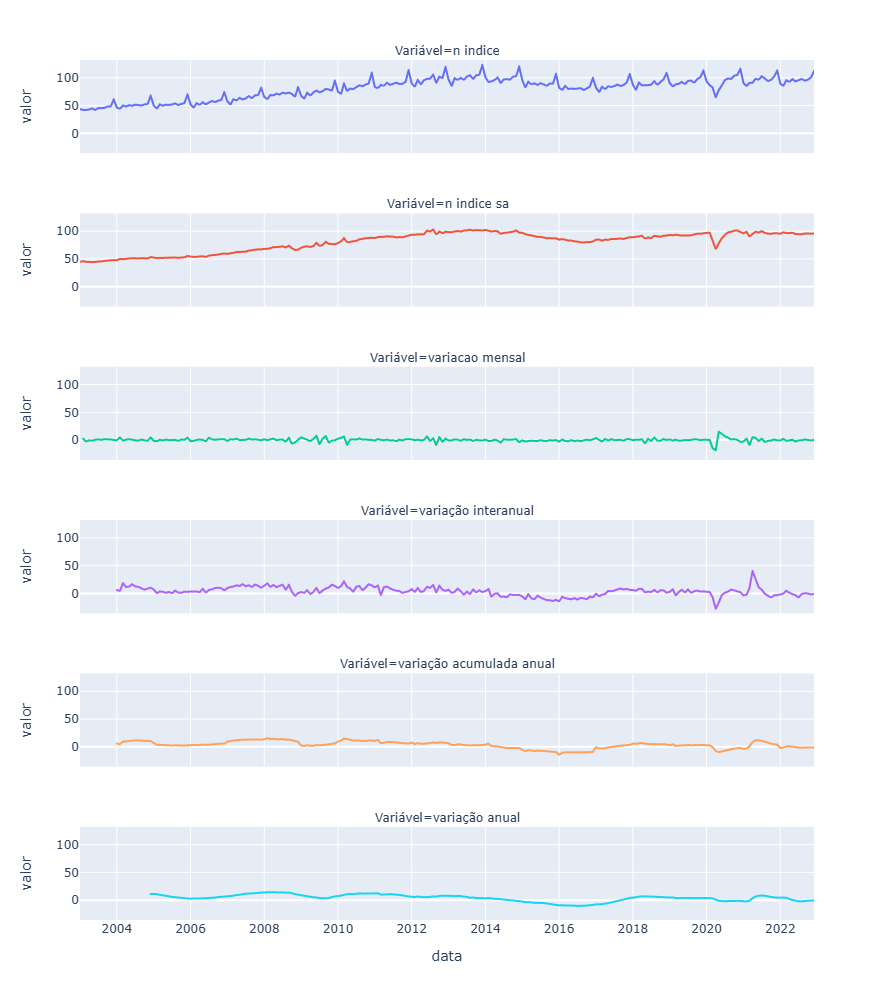

In [217]:
g=plotly.express.line(sidra_trat,x=sidra_trat['data'],y=sidra_trat['valor'],facet_col=sidra_trat['Variável'],facet_col_wrap=1
                     ,color='Variável',width=900,height=1000)
g.update_layout(showlegend=False)
g.show()

array([<Axes: xlabel='data'>, <Axes: xlabel='data'>,
       <Axes: xlabel='data'>, <Axes: xlabel='data'>,
       <Axes: xlabel='data'>, <Axes: xlabel='data'>], dtype=object)

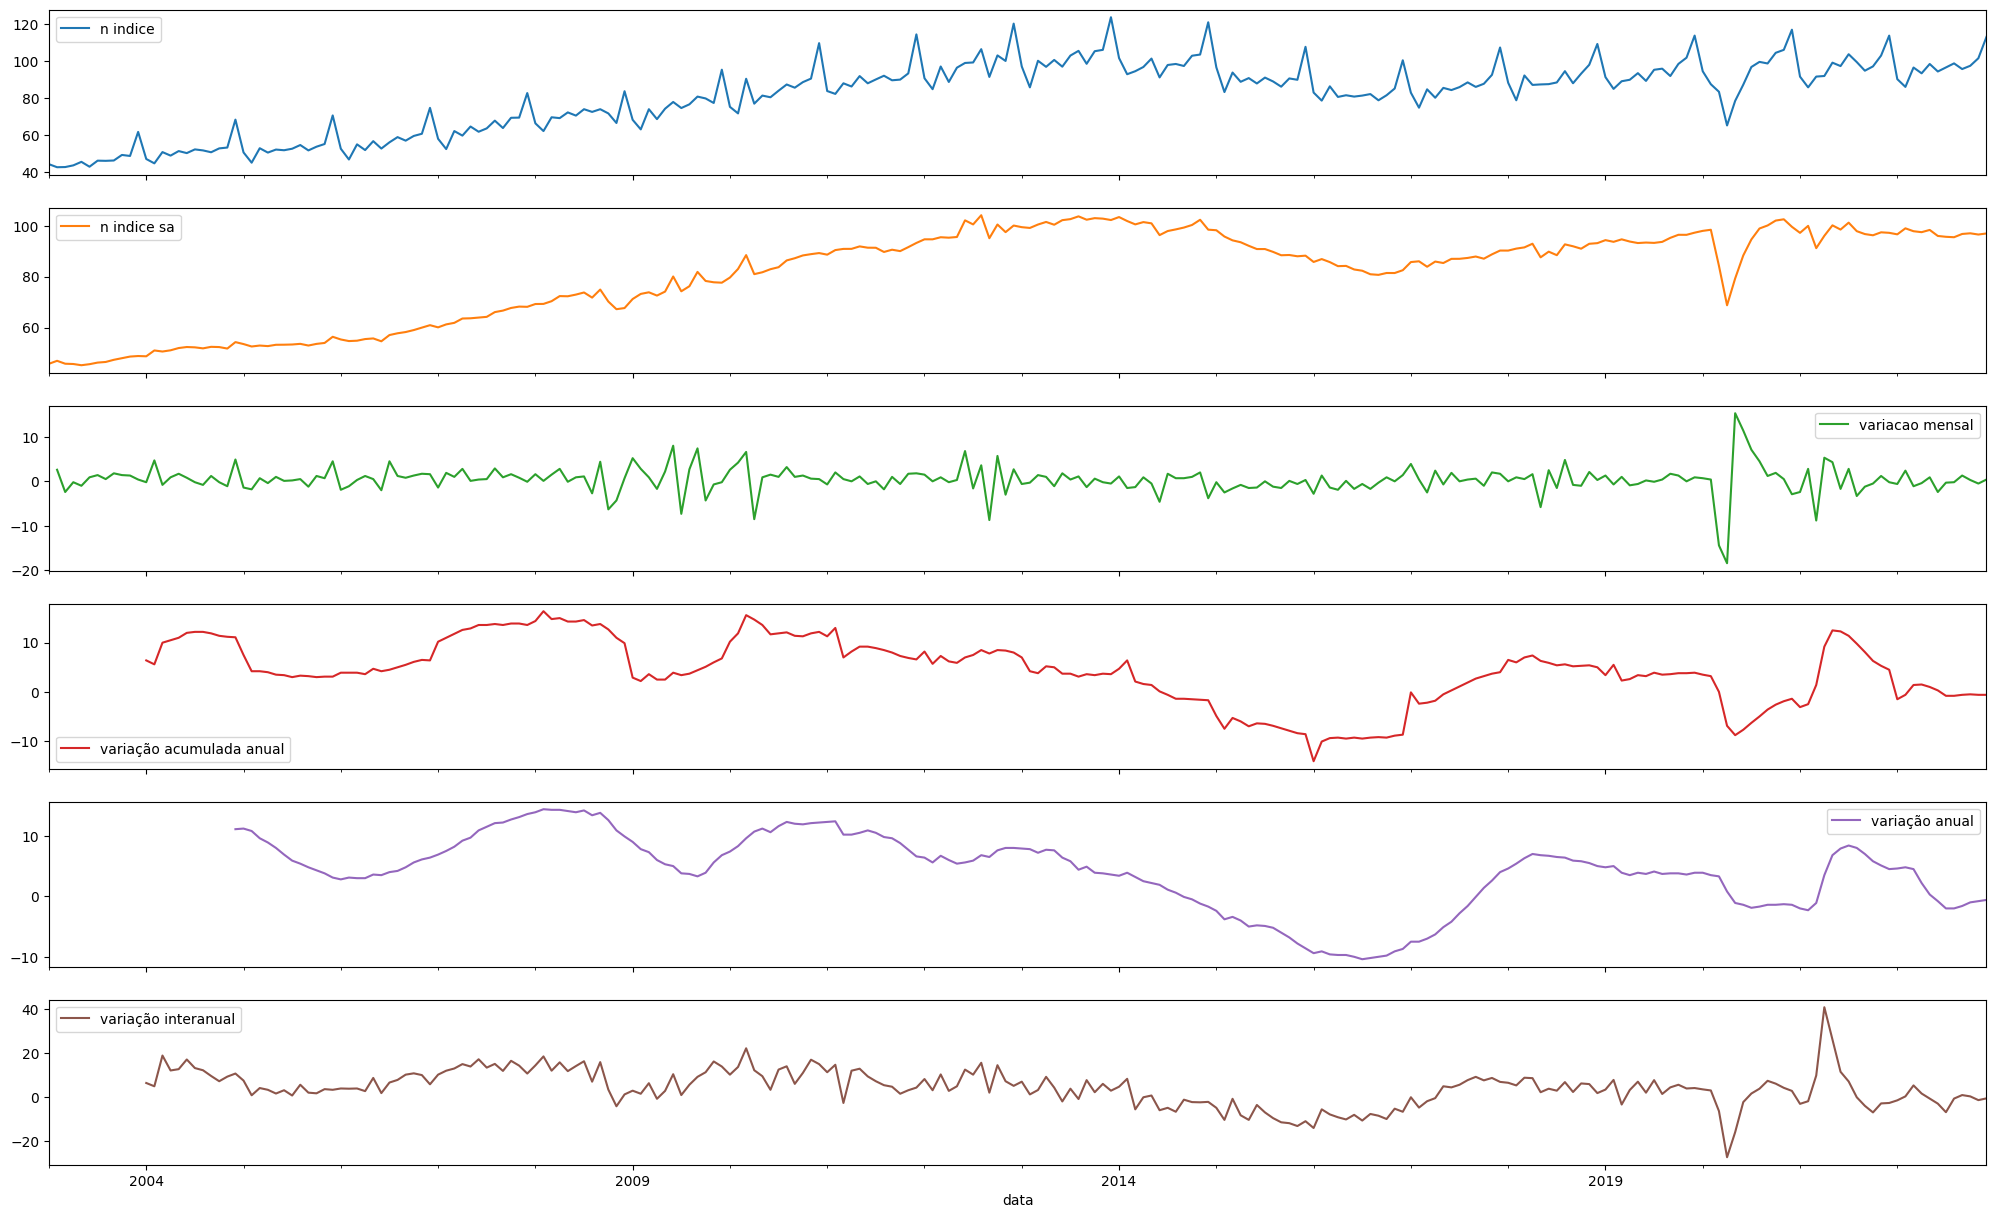

In [215]:
dados=sidra_trat.pivot(index='data',columns='Variável',values='valor')
dados.plot(subplots=True, figsize=(25,15))